# PROYECTO PI2 - TELECOMUNICACIONES - EDA

### **DESCRIPCIÓN**

##### En este proyecto se realizará un análisis completo y detallado, para una empresa de Telecomunicaciones, que permita reconocer el comportamiento de este sector a nivel nacional, considerando que la principal principal activdad es brindar el servicio de internet, pero también consideraremos el comportamiento asociado al resto de los servicios de comunicación, con el fin de orientar a la empresa en brindar una buena calidad de sus servicios, identificar oportunidades de crecimiento y poder plantear soluciones personalizadas a sus posibles clientes.

#### **Importamos las librerías y los datasets a utilizar en el proyecto**

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm
import seaborn as sns

In [206]:
df1 = pd.read_csv('PI2-Datasets\Acceso a Internet Fijo por rangos de velocidad de bajada y privincia.csv')
df2 = pd.read_csv('PI2-Datasets\Accesos a banda ancha y banda angosta por provincia.csv')
df3 = pd.read_csv('PI2-Datasets\Accesos a Internet fijo por velocidad de bajada y localidad.csv')
df4 = pd.read_csv('PI2-Datasets\Conectividad al servicio de Internet.csv')
df5 = pd.read_csv('PI2-Datasets\Ingresos trimestrales por la prestación del servicio de Internet fijo.csv')
df6 = pd.read_csv('PI2-Datasets\Listado de localidades con conectividad a internet.csv')
df7 = pd.read_csv('PI2-Datasets\Penetración de Internet fijo (accesos por cada 100 hogares).csv')
df8 = pd.read_csv('PI2-Datasets\Penetración por hogares nacional de Internet fijo.csv')
df9 = pd.read_csv('PI2-Datasets\Serie trimestral de accesos a Internet fijo por tecnología.csv')
df10 = pd.read_csv('PI2-Datasets\Total nacional de accesos a Internet fijo por banda ancha y banda angosta.csv')
df11 = pd.read_csv('PI2-Datasets\Velocidad Media de bajada de Internet fijo.csv')

### **1. ANALIZAMOS LA PENETRACIÓN DE INTERNET FIJO A NIVEL NACIONAL**


#### EXPLORACIÓN DE DATOS

In [63]:
#ELIMINAMOS LOS CARACTERES NO NUMÉRICOS, EXCEPTO LOS PUNTOS DECIMALES

import re
df7['Accesos por cada 100 hogares'] = df7['Accesos por cada 100 hogares'].apply(lambda x: re.sub(r'[^0-9.]', '', str(x)))

In [64]:
#REEMPLAZAMOS LA COMA POR PUNTO

df7['Accesos por cada 100 hogares'] = df7['Accesos por cada 100 hogares'].str.replace(',', '.')

In [67]:
#CONVERTIMOS LA COLUMNA A TIPO NUMÉRICO

df7['Accesos por cada 100 hogares'] = pd.to_numeric(df7['Accesos por cada 100 hogares'], errors='coerce')
df7['Accesos por cada 100 hogares_Numeric'] = df7['Accesos por cada 100 hogares'] / 100

In [68]:
df7.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Accesos por cada 100 hogares_Numeric
0,2022,3,Buenos Aires,7811,78.11
1,2022,3,Capital Federal,12228,122.28
2,2022,3,Catamarca,6533,65.33
3,2022,3,Chaco,4386,43.86
4,2022,3,Chubut,8438,84.38


#### PRIMER ANÁLISIS - GRÁFICO

In [69]:
# PENETRACIÓN PROMEDIO A NIVEL NACIONAL

df7["Accesos por cada 100 hogares_Numeric"].mean()

44.63539285714286

In [70]:
# AÑO Y TRIMESTRE CON LA MAYOR PENETRACIÓN DE INTERNET FIJO

idx_max_penetracion = df7["Accesos por cada 100 hogares_Numeric"].idxmax()
anio_max_penetracion = df7.loc[idx_max_penetracion, "Año"]
trimestre_max_penetracion = df7.loc[idx_max_penetracion, "Trimestre"]
print("Año y trimestre con mayor penetración de Internet fijo:", anio_max_penetracion, trimestre_max_penetracion)


Año y trimestre con mayor penetración de Internet fijo: 2017 2


In [71]:
# AÑO Y TRIMESTRE CON LA MENOR PENETRACIÓN DE INTERNET FIJO

idx_min_penetracion = df7["Accesos por cada 100 hogares_Numeric"].idxmin()
anio_min_penetracion = df7.loc[idx_min_penetracion, "Año"]
trimestre_min_penetracion = df7.loc[idx_min_penetracion, "Trimestre"]
print("Año y trimestre con menor penetración de Internet fijo:", anio_min_penetracion, trimestre_min_penetracion)

Año y trimestre con menor penetración de Internet fijo: 2015 4


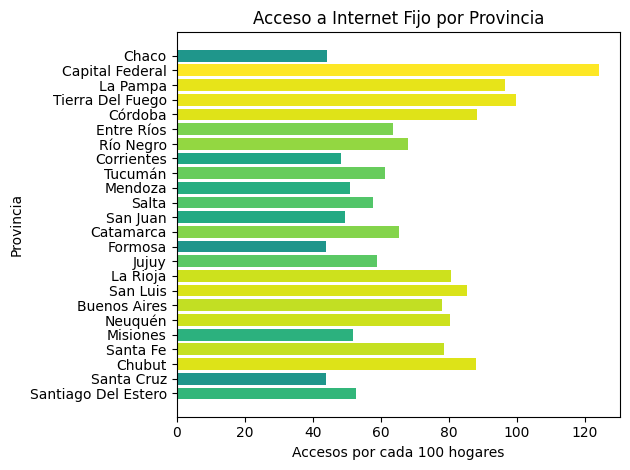

In [79]:
# Ordenamos los datos por los accesos por cada 100 hogares en orden ascendente
df_sorted = df7.sort_values('Accesos por cada 100 hogares_Numeric')

# Obtenemos los valores de las provincias y los accesos por cada 100 hogares
provincias = df_sorted['Provincia']
accesos = df_sorted['Accesos por cada 100 hogares_Numeric']

# Creamos una lista de colores personalizados para cada barra
num_barras = len(provincias)
colores = plt.cm.viridis(np.linspace(0, 1, num_barras))

# Creamos el gráfico de barras horizontales
plt.barh(provincias, accesos, color=colores)

# Configuramos etiquetas y título
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Provincia')
plt.title('Acceso a Internet Fijo por Provincia')

# Ajustamos los márgenes para evitar recortes en las etiquetas
plt.tight_layout()

# Mostramos el gráfico
plt.show()

### **OBSERVACIONES - 1**

#### Podemos observar a detalle las provincias en las que hay menos acceso a Internet fijo, en las cuales se debería hacer más énfasis para aumentar la productividad en dichas zonas específicas como por ejemplo: Santa Cruz, Formosa, Chaco, entre otras. Así como también visualizamos las que cuentan con mayor acceso como Capital Federal y Tierra del Fuego.


### **2. INGRESOS TRIMESTRALES - SERVICIO DE INTERNET FIJO**

#### EXPLORACIÓN DE DATOS

In [114]:
# Seleccionamos las columnas relevantes de df5
df5_relevantes = df5[['Año', 'Trimestre', 'Ingresos (miles de pesos)', 'Periodo']]

# Seleccionamos las columnas relevantes de df2
df2_relevantes = df2[['Año', 'Trimestre', 'Provincia', 'Banda ancha fija', 'Dial up', 'Total']]

# Combinar los DataFrames en función de las columnas de año y trimestre
df_combinado = pd.merge(df5_relevantes, df2_relevantes, on=['Año', 'Trimestre'])

In [115]:
df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 0 to 839
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        840 non-null    int64 
 1   Trimestre                  840 non-null    int64 
 2   Ingresos (miles de pesos)  840 non-null    object
 3   Periodo                    840 non-null    object
 4   Provincia                  840 non-null    object
 5   Banda ancha fija           840 non-null    object
 6   Dial up                    838 non-null    object
 7   Total                      840 non-null    object
dtypes: int64(2), object(6)
memory usage: 59.1+ KB


In [117]:
# Reemplazamos los puntos como separadores de miles por una cadena vacía
df_combinado['Ingresos (miles de pesos)'] = df_combinado['Ingresos (miles de pesos)'].str.replace('.', '')

# Reemplazamos la coma decimal por un punto decimal
df_combinado['Ingresos (miles de pesos)'] = df_combinado['Ingresos (miles de pesos)'].str.replace(',', '.')

# Convertimos la columna a tipo numérico
df_combinado['Ingresos (miles de pesos)'] = pd.to_numeric(df_combinado['Ingresos (miles de pesos)'])

# Verificamos el nuevo tipo de dato de la columna
print(df_combinado['Ingresos (miles de pesos)'].dtypes)

int64


C:\Users\Mauro\AppData\Local\Temp\ipykernel_11096\224273771.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_combinado['Ingresos (miles de pesos)'] = df_combinado['Ingresos (miles de pesos)'].str.replace('.', '')


In [120]:
df_combinado.head(2)

,Año,Trimestre,Ingresos (miles de pesos),Periodo,Provincia,Banda ancha fija,Dial up,Total
0,2022,3,67055930,Jul-Sept 2022,Buenos Aires,4.715.469,6.199,4.721.668
1,2022,3,67055930,Jul-Sept 2022,Capital Federal,1.545.534,2.145,1.547.679


#### SEGUNDO ANÁLISIS - GRÁFICO

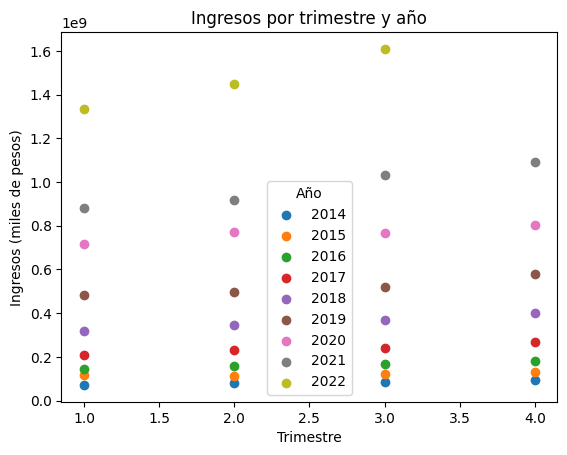

In [125]:
# Agrupar los ingresos por trimestre y año
ingresos_trimestre_anio = df_combinado.groupby(['Año', 'Trimestre'])['Ingresos (miles de pesos)'].sum()

# Crear un DataFrame con los ingresos por trimestre y año
df_ingresos = ingresos_trimestre_anio.unstack()

# Generar el gráfico de dispersión
for año, ingresos in df_ingresos.iterrows():
    plt.scatter(ingresos.index, ingresos.values, label=año)

# Configurar los ejes y el título del gráfico
plt.xlabel('Trimestre')
plt.ylabel('Ingresos (miles de pesos)')
plt.title('Ingresos por trimestre y año')

# Añadir una leyenda
plt.legend(title='Año')

# Mostrar el gráfico
plt.show()

### **OBSERVACIONES - 2**

#### Visualizamos que la menor cantidad de ingresos suelen existir en el primer timestre de cada año y va subiendo de manera progresiva para los trimestres posteriores. Llegando así a la conclusión de que se podría crear algún método que fortalezca el consumo de los servicios brindados por la empresa en el los primeros trimestres de cada año y mantenga o mejore el rendimiento en los últimos.

### **3. EVOLUCIÓN DE LOS ACCESOS A INTERNET FIJO POR TECNOLOGÍA A LO LARGO DEL TIEMPO**

#### EXPLORACIÓN DE DATOS

In [142]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           35 non-null     int64  
 1   Trimestre     35 non-null     int64  
 2   ADSL          35 non-null     object 
 3   Cablemodem    35 non-null     object 
 4   Fibra óptica  35 non-null     object 
 5   Wireless      35 non-null     float64
 6   Otros         35 non-null     float64
 7   Total         35 non-null     object 
 8   Periodo       35 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 2.6+ KB


In [156]:
# Reemplazamos el punto y la coma en las columnas 'ADSL', 'Cablemodem' y 'Fibra óptica'
df9['ADSL'] = df9['ADSL'].str.replace('.', '').str.replace(',', '.').astype(float)
df9['Cablemodem'] = df9['Cablemodem'].str.replace('.', '').str.replace(',', '.').astype(float)
df9['Fibra óptica'] = df9['Fibra óptica'].str.replace('.', '').str.replace(',', '.').astype(float)

C:\Users\Mauro\AppData\Local\Temp\ipykernel_11096\954746537.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df9['ADSL'] = df9['ADSL'].str.replace('.', '').str.replace(',', '.').astype(float)
C:\Users\Mauro\AppData\Local\Temp\ipykernel_11096\954746537.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df9['Cablemodem'] = df9['Cablemodem'].str.replace('.', '').str.replace(',', '.').astype(float)
C:\Users\Mauro\AppData\Local\Temp\ipykernel_11096\954746537.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df9['Fibra ó

In [153]:
df9.head(3)

,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
Año,,,,,,,,
2022,3,1395277.0,6031970.0,2871541.0,557.110,235.230,11.091.128,Jul-Sept 2022
2022,2,1468333.0,5979214.0,2723285.0,556.243,231.609,10.958.684,Abr-Jun 2022
2022,1,1533240.0,6073426.0,2219533.0,545.814,251.996,10.624.009,Ene-Mar 2022


#### TERCER ANÁLISIS - GRÁFICO

<Figure size 1200x600 with 0 Axes>

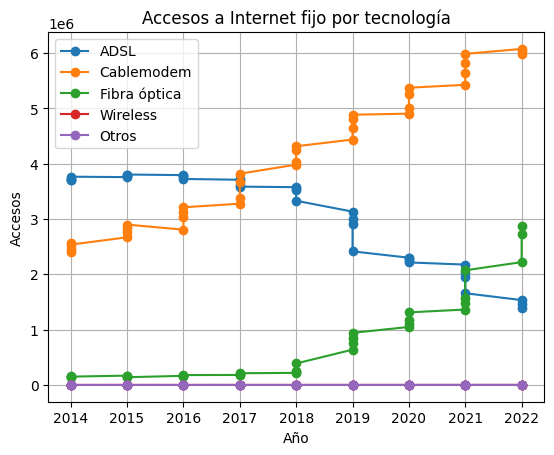

In [157]:
# Establecemos 'Año' como índice del DataFrame
df9.set_index('Año', inplace=True)

# Seleccionamos las columnas relevantes para las tecnologías de interés
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
df_tecnologias = df9[tecnologias]

# Graficamos los accesos por tecnologías a lo largo del tiempo
plt.figure(figsize=(12, 6))
df_tecnologias.plot(marker='o')
plt.xlabel('Año')
plt.ylabel('Accesos')
plt.title('Accesos a Internet fijo por tecnología')
plt.grid(True)
plt.legend()
plt.show()

### **OBSERVACIONES - 3**

#### Dominio del Cable modem y Fibra óptica: A medida que avanza el tiempo, la tecnología de Cable modem y fibra óptica muestran un crecimiento más pronunciado en comparación con ADSL y otros. Esto puede indicar una preferencia creciente por el cable modem y fibra óptica como opción de conexión a Internet fijo.

#### Posible oportunidad de inversión: Dado el crecimiento continuo de los accesos a Internet fijo en general y el fuerte crecimiento de la tecnología de Fibra óptica, podría considerarse una oportunidad de inversión en la expansión de redes de fibra óptica para atender la demanda creciente y captar más clientes.

### **4. EVALUACIÓN DEL TOTAL NACIONAL DE ACCESOS A INTERNET FIJO POR BANDAS**

#### EXPLORACIÓN DE DATOS

In [178]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               840 non-null    int64 
 1   Trimestre         840 non-null    int64 
 2   Provincia         840 non-null    object
 3   Banda ancha fija  840 non-null    object
 4   Dial up           838 non-null    object
 5   Total             840 non-null    object
dtypes: int64(2), object(4)
memory usage: 39.5+ KB


In [158]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               35 non-null     int64  
 1   Trimestre         35 non-null     int64  
 2   Banda ancha fija  35 non-null     object 
 3   Dial up           35 non-null     float64
 4   Total             35 non-null     object 
 5   Periodo           35 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.8+ KB


In [164]:
df10.head(3)

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,3,11.078.691,12.437,11.091.128,Jul-Sept 2022
1,2022,2,10.946.248,12.436,10.958.684,Abr-Jun 2022
2,2022,1,10.611.390,12.619,10.624.009,Ene-Mar 2022


In [165]:
# Convertimos las columnas 'Banda ancha fija' y 'Total' a tipo numérico

df10['Banda ancha fija'] = df10['Banda ancha fija'].str.replace('.', '').astype(float)
df10['Total'] = df10['Total'].str.replace('.', '').astype(float)

C:\Users\Mauro\AppData\Local\Temp\ipykernel_11096\2899505876.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df10['Banda ancha fija'] = df10['Banda ancha fija'].str.replace('.', '').astype(float)
C:\Users\Mauro\AppData\Local\Temp\ipykernel_11096\2899505876.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df10['Total'] = df10['Total'].str.replace('.', '').astype(float)


#### CUARTO ANÁLISIS - GRÁFICO

In [166]:
# Promedio de accesos a banda ancha fija y dial up

promedio_banda_ancha = df10['Banda ancha fija'].mean()
promedio_dial_up = df10['Dial up'].mean()

print("Promedio de accesos a banda ancha fija:", promedio_banda_ancha)
print("Promedio de accesos a dial up:", promedio_dial_up)

Promedio de accesos a banda ancha fija: 8274417.085714285
Promedio de accesos a dial up: 23.383371428571426


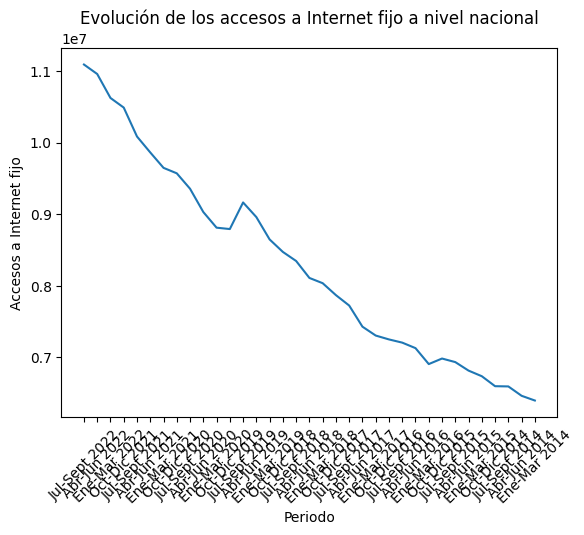

In [171]:
# Gráfica de línea para visualizar la evolución de los accesos a Internet fijo a nivel nacional

plt.plot(df10['Periodo'], df10['Total'])
plt.xlabel('Periodo')
plt.ylabel('Accesos a Internet fijo')
plt.title('Evolución de los accesos a Internet fijo a nivel nacional')
plt.xticks(rotation=45)
plt.show()

C:\Users\Mauro\AppData\Local\Temp\ipykernel_11096\3861368514.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2["Banda ancha fija"] = df2["Banda ancha fija"].str.replace(".", "").astype(float)


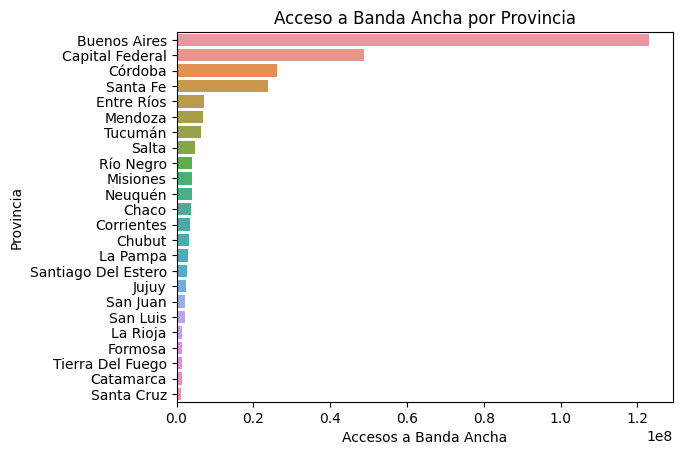

In [184]:
# Acceso a Banda Ancha por Provincia

# Calculamos el total de accesos a banda ancha por provincia
df2["Banda ancha fija"] = df2["Banda ancha fija"].str.replace(".", "").astype(float)
df2_provincia_total = df.groupby("Provincia")["Banda ancha fija"].sum().reset_index()

# Ordenamos las provincias según el número de accesos a banda ancha
df2_provincia_total = df2_provincia_total.sort_values("Banda ancha fija", ascending=False)

# Creamos un gráfico de barras para representar el acceso a banda ancha por provincia
sns.barplot(data=df2_provincia_total, x="Banda ancha fija", y="Provincia")
plt.xlabel("Accesos a Banda Ancha")
plt.ylabel("Provincia")
plt.title("Acceso a Banda Ancha por Provincia")
plt.show()

### **OBSERVACIONES - 4**

#### Podemos observar que el la volución de los accesos a nivel nacional crece de manera constante a lo largo del tiempo. También podemos visualizar que el acceso a Banda ancha por Provincia tiene mucho carácter de diferencia entre las distintas provincias. Esta información puede ayudar a la empresa a comprender mejor el comportamiento del mercado y tomar decisiones estratégicas en términos de inversión y mejora de servicios.

### **5. CONECTIVIDAD AL SERVICIO DE INTERNET**

#### EXPLORACIÓN DE DATOS

In [200]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      4312 non-null   object 
 1   Partido        4312 non-null   object 
 2   Localidad      4312 non-null   object 
 3   Poblacion      4312 non-null   int64  
 4   ADSL           4312 non-null   object 
 5   CABLEMODEM     4312 non-null   object 
 6   DIALUP         4312 non-null   object 
 7   FIBRAOPTICA    4312 non-null   object 
 8   SATELITAL      4312 non-null   object 
 9   WIRELESS       4312 non-null   object 
 10  TELEFONIAFIJA  4312 non-null   object 
 11  3G             4312 non-null   object 
 12  4G             4312 non-null   object 
 13  link           4300 non-null   float64
 14  Latitud        4312 non-null   object 
 15  Longitud       4312 non-null   object 
dtypes: float64(1), int64(1), object(14)
memory usage: 539.1+ KB


In [201]:
# Obtener la cantidad de conexiones de diferentes tipos en cada región
conexiones_por_region = df4.groupby('Provincia')['ADSL', 'CABLEMODEM', 'FIBRAOPTICA', 'DIALUP', 'SATELITAL', 'WIRELESS', 'TELEFONIAFIJA', '3G', '4G'].sum()

C:\Users\Mauro\AppData\Local\Temp\ipykernel_11096\3450672683.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  conexiones_por_region = df4.groupby('Provincia')['ADSL', 'CABLEMODEM', 'FIBRAOPTICA', 'DIALUP', 'SATELITAL', 'WIRELESS', 'TELEFONIAFIJA', '3G', '4G'].sum()


In [207]:
# Conversión de las columnas y reemplazo de valores necesarios.

df4 = df4.replace('SI', 1)
df4 = df4.replace('--', float('nan'))
df4['ADSL'] = pd.to_numeric(df4['ADSL'], errors='coerce')
df4['CABLEMODEM'] = pd.to_numeric(df4['CABLEMODEM'], errors='coerce')
df4['FIBRAOPTICA'] = pd.to_numeric(df4['FIBRAOPTICA'], errors='coerce')
df4['DIALUP'] = pd.to_numeric(df4['DIALUP'], errors='coerce')
df4['SATELITAL'] = pd.to_numeric(df4['SATELITAL'], errors='coerce')
df4['WIRELESS'] = pd.to_numeric(df4['WIRELESS'], errors='coerce')
df4['TELEFONIAFIJA'] = pd.to_numeric(df4['TELEFONIAFIJA'], errors='coerce')
df4['3G'] = pd.to_numeric(df4['3G'], errors='coerce')
df4['4G'] = pd.to_numeric(df4['4G'], errors='coerce')

In [210]:
# Filtramos el dataframe para incluir solo las columnas relevantes

conexiones_por_region = df4.groupby('Provincia')['ADSL', 'CABLEMODEM', 'FIBRAOPTICA', 'DIALUP', 'SATELITAL', 'WIRELESS', 'TELEFONIAFIJA', '3G', '4G'].sum()

C:\Users\Mauro\AppData\Local\Temp\ipykernel_11096\2526918158.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  conexiones_por_region = df4.groupby('Provincia')['ADSL', 'CABLEMODEM', 'FIBRAOPTICA', 'DIALUP', 'SATELITAL', 'WIRELESS', 'TELEFONIAFIJA', '3G', '4G'].sum()


#### QUINTO ANÁLISIS - GRÁFICO

##### Conexiones **ADSL** por provincia

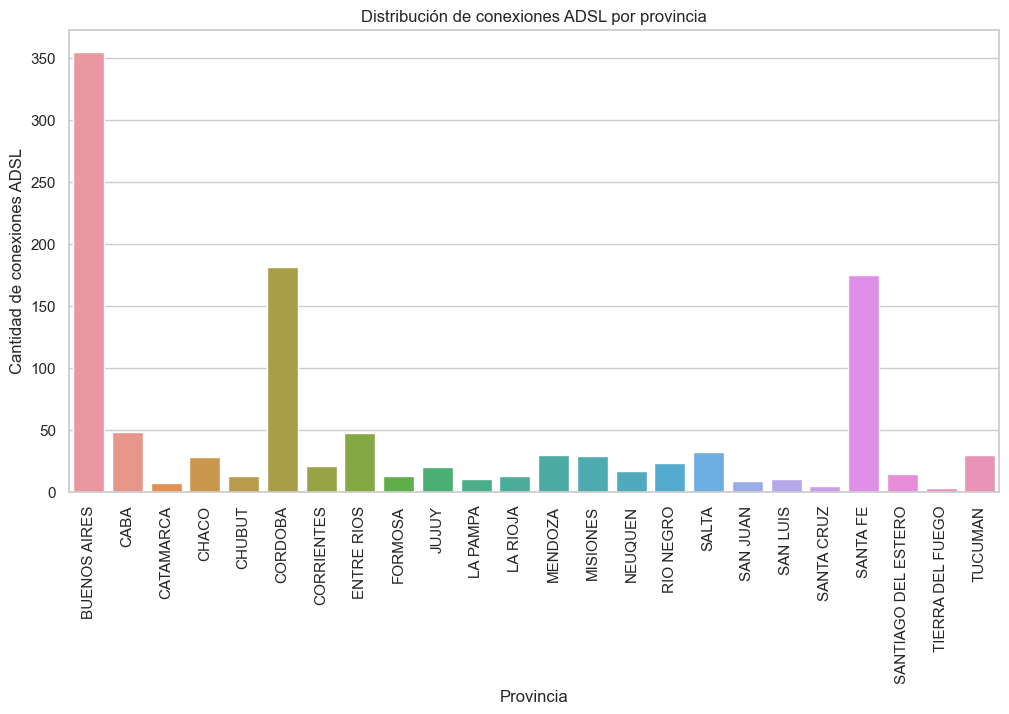

In [211]:
# Visualización con Seaborn
sns.set(style="whitegrid")  # Configurar ajustes estéticos

# Gráfico de barras para visualizar la distribución de las conexiones ADSL en las regiones
plt.figure(figsize=(12, 6))
sns.barplot(data=conexiones_por_region, x=conexiones_por_region.index, y='ADSL')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de conexiones ADSL')
plt.title('Distribución de conexiones ADSL por provincia')
plt.xticks(rotation=90)
plt.show()

##### Conexión **SATELITAL** por provincia

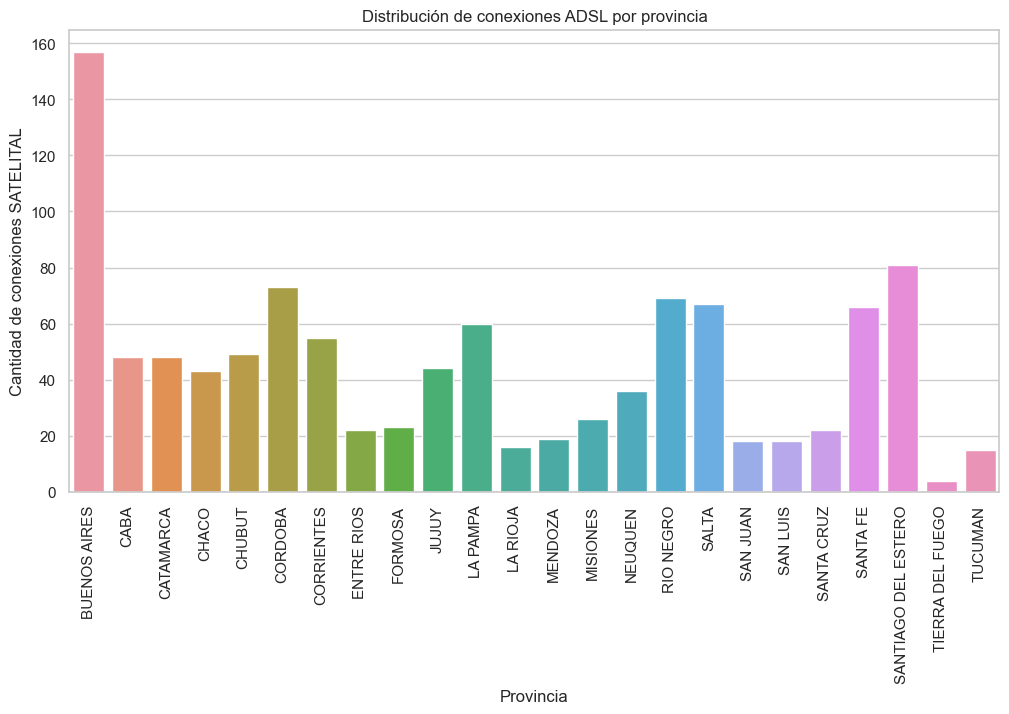

In [213]:
# Visualización con Seaborn
sns.set(style="whitegrid")  # Configurar ajustes estéticos

# Gráfico de barras para visualizar la distribución de las conexiones Satelitales en las regiones
plt.figure(figsize=(12, 6))
sns.barplot(data=conexiones_por_region, x=conexiones_por_region.index, y='SATELITAL')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de conexiones SATELITAL')
plt.title('Distribución de conexion Satelital por provincia')
plt.xticks(rotation=90)
plt.show()

##### Conexión **CABLE MODEM** por provincia

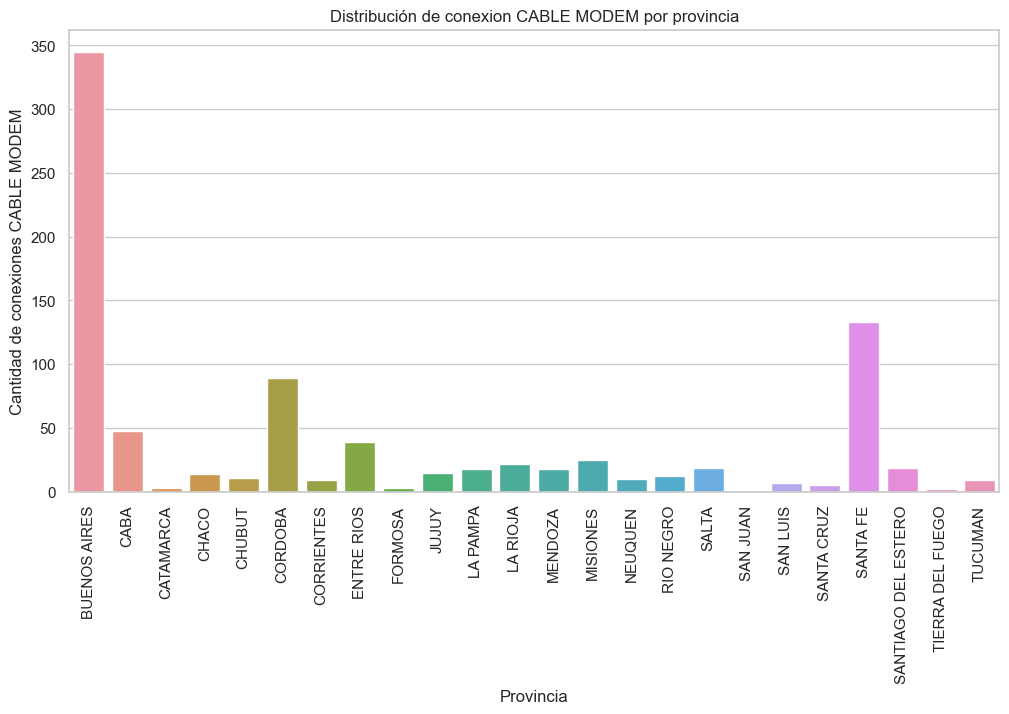

In [216]:
# Visualización con Seaborn
sns.set(style="whitegrid")  # Configurar ajustes estéticos

# Gráfico de barras para visualizar la distribución de las conexiones CABLE MODEM en las regiones
plt.figure(figsize=(12, 6))
sns.barplot(data=conexiones_por_region, x=conexiones_por_region.index, y='CABLEMODEM')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de conexiones CABLE MODEM')
plt.title('Distribución de conexion CABLE MODEM por provincia')
plt.xticks(rotation=90)
plt.show()

##### Conexión **DIAL UP** por provincia

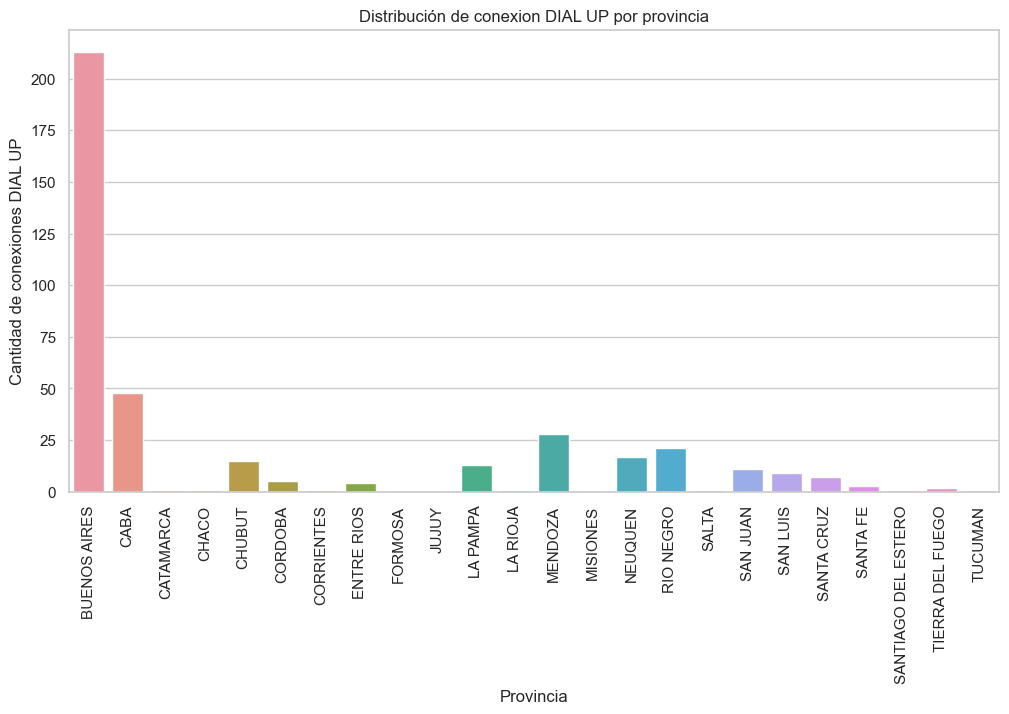

In [217]:
# Visualización con Seaborn
sns.set(style="whitegrid")  # Configurar ajustes estéticos

# Gráfico de barras para visualizar la distribución de las conexiones CABLE MODEM en las regiones
plt.figure(figsize=(12, 6))
sns.barplot(data=conexiones_por_region, x=conexiones_por_region.index, y='DIALUP')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de conexiones DIAL UP')
plt.title('Distribución de conexion DIAL UP por provincia')
plt.xticks(rotation=90)
plt.show()

##### Conexión **FIBRA ÓPTICA** por provincia

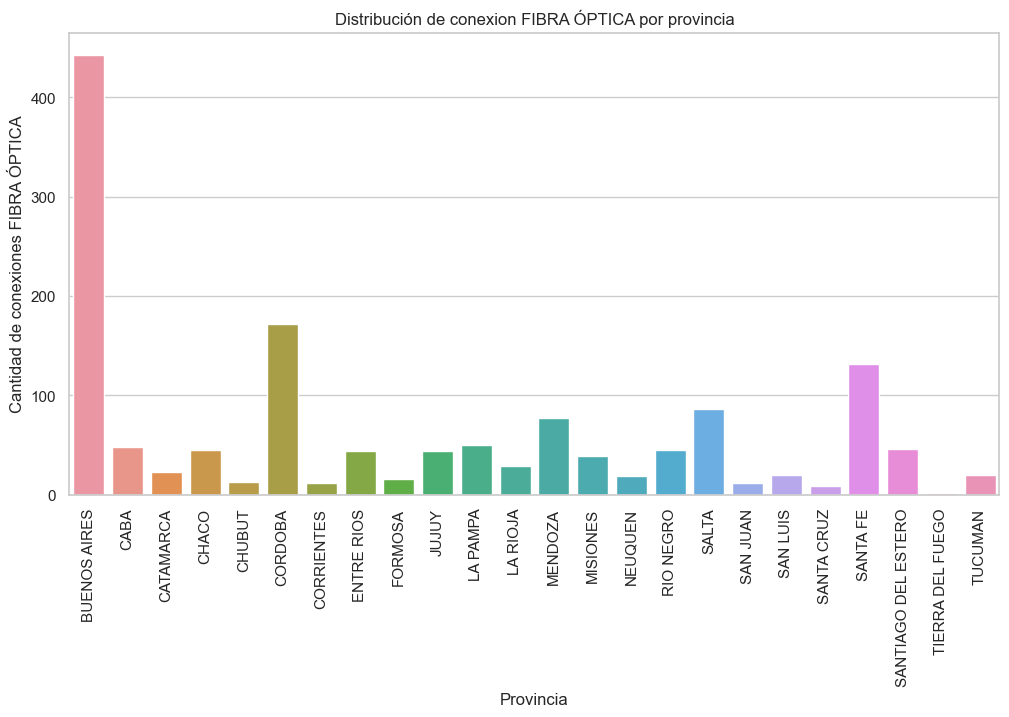

In [218]:
# Visualización con Seaborn
sns.set(style="whitegrid")  # Configurar ajustes estéticos

# Gráfico de barras para visualizar la distribución de las conexiones CABLE MODEM en las regiones
plt.figure(figsize=(12, 6))
sns.barplot(data=conexiones_por_region, x=conexiones_por_region.index, y='FIBRAOPTICA')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de conexiones FIBRA ÓPTICA')
plt.title('Distribución de conexion FIBRA ÓPTICA por provincia')
plt.xticks(rotation=90)
plt.show()

##### Conexión **WIRELESS** por provincia

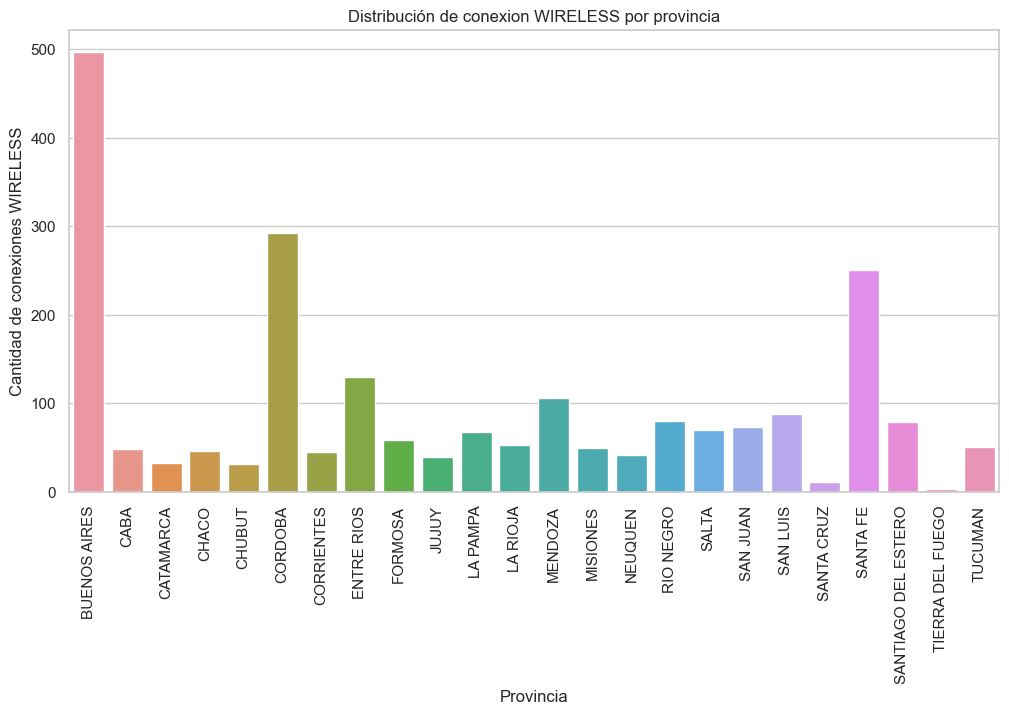

In [219]:
# Visualización con Seaborn
sns.set(style="whitegrid")  # Configurar ajustes estéticos

# Gráfico de barras para visualizar la distribución de las conexiones CABLE MODEM en las regiones
plt.figure(figsize=(12, 6))
sns.barplot(data=conexiones_por_region, x=conexiones_por_region.index, y='WIRELESS')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de conexiones WIRELESS')
plt.title('Distribución de conexion WIRELESS por provincia')
plt.xticks(rotation=90)
plt.show()

##### Conexión de **TELEFONÍA FIJA** por provincia:

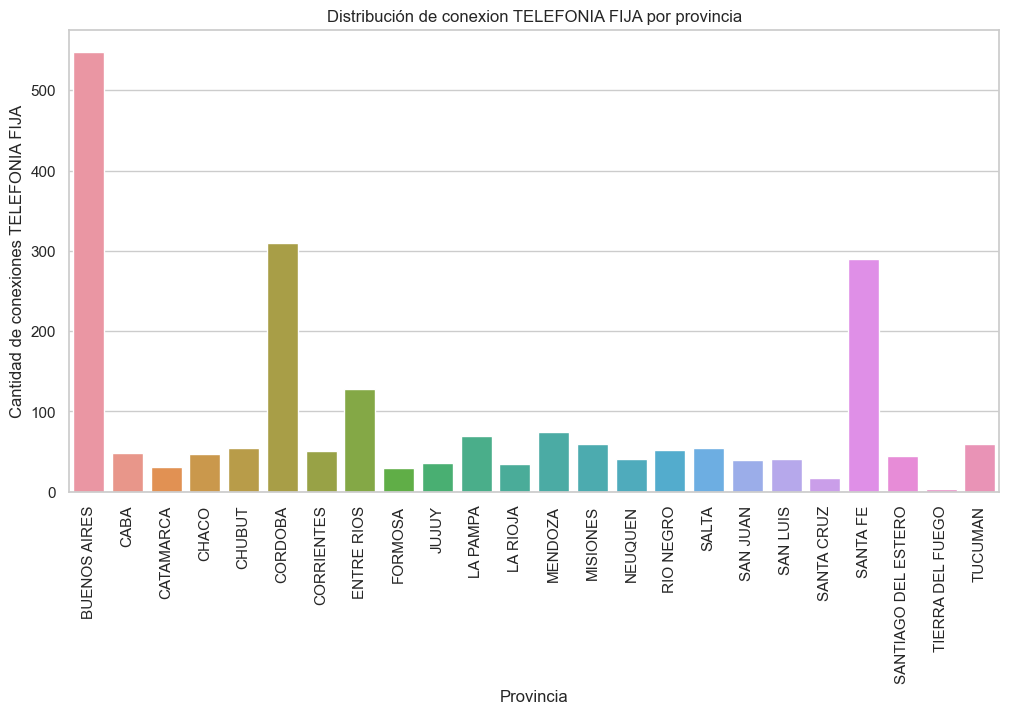

In [220]:
# Visualización con Seaborn
sns.set(style="whitegrid")  # Configurar ajustes estéticos

# Gráfico de barras para visualizar la distribución de las conexiones CABLE MODEM en las regiones
plt.figure(figsize=(12, 6))
sns.barplot(data=conexiones_por_region, x=conexiones_por_region.index, y='TELEFONIAFIJA')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de conexiones TELEFONIA FIJA')
plt.title('Distribución de conexion TELEFONIA FIJA por provincia')
plt.xticks(rotation=90)
plt.show()

##### Conexión **3G** por provincia

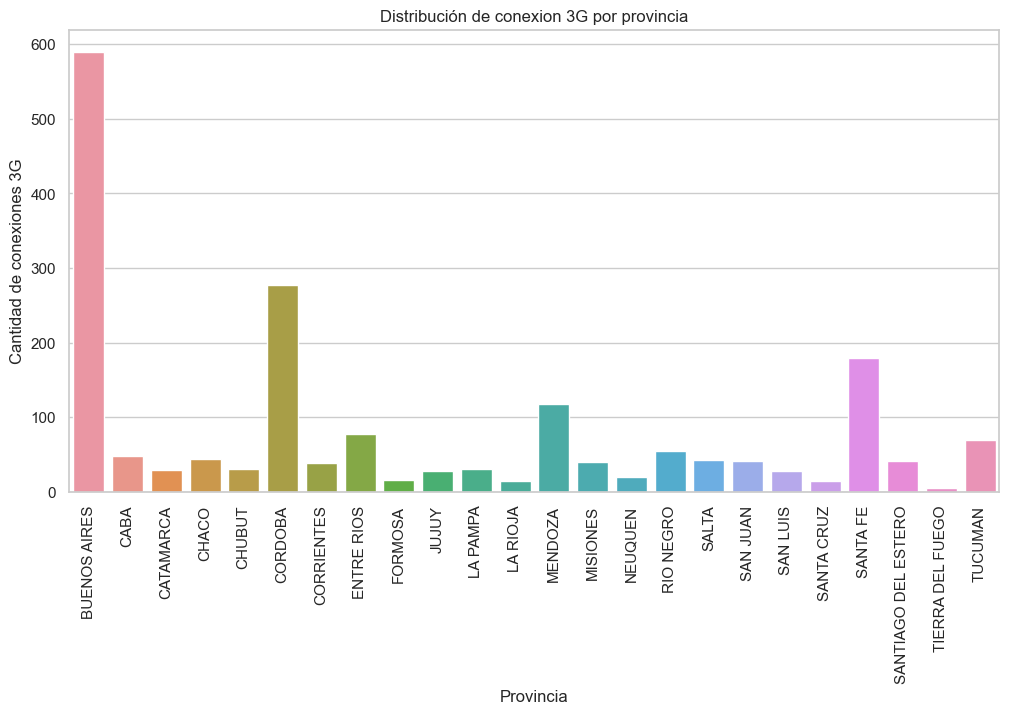

In [224]:
# Visualización con Seaborn
sns.set(style="whitegrid")  # Configurar ajustes estéticos

# Gráfico de barras para visualizar la distribución de las conexiones CABLE MODEM en las regiones
plt.figure(figsize=(12, 6))
sns.barplot(data=conexiones_por_region, x=conexiones_por_region.index, y='3G')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de conexiones 3G')
plt.title('Distribución de conexion 3G por provincia')
plt.xticks(rotation=90)
plt.show()

##### Conexión **4G** por provincia

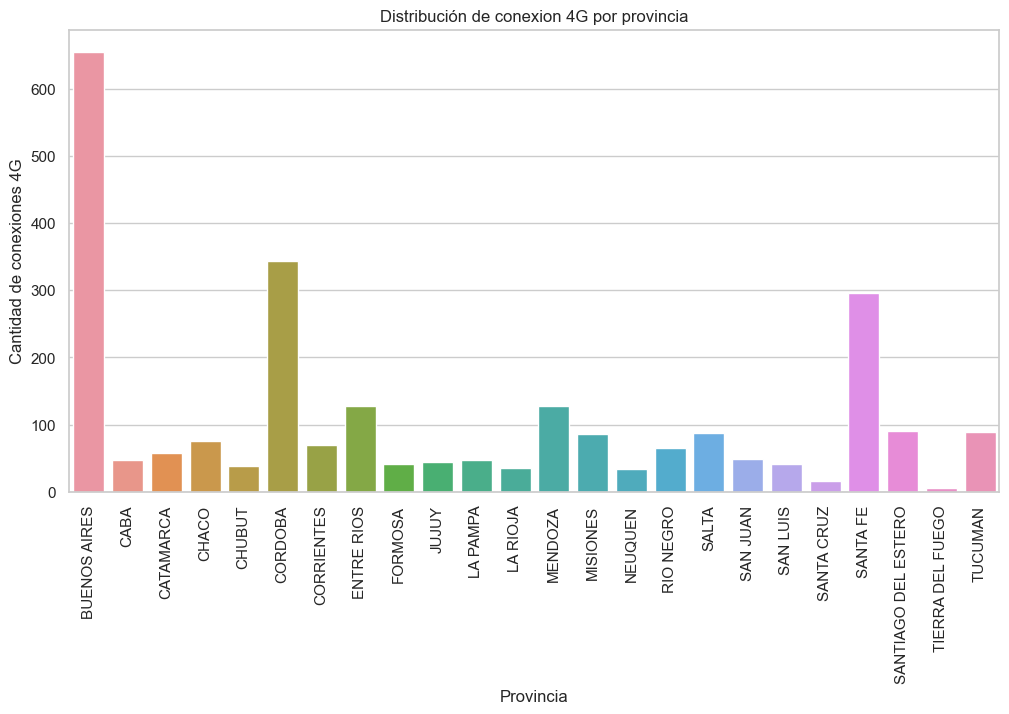

In [225]:
# Visualización con Seaborn
sns.set(style="whitegrid")  # Configurar ajustes estéticos

# Gráfico de barras para visualizar la distribución de las conexiones CABLE MODEM en las regiones
plt.figure(figsize=(12, 6))
sns.barplot(data=conexiones_por_region, x=conexiones_por_region.index, y='4G')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de conexiones 4G')
plt.title('Distribución de conexion 4G por provincia')
plt.xticks(rotation=90)
plt.show()

##### Comparación del uso total de las **TECNOLOGÍAS**

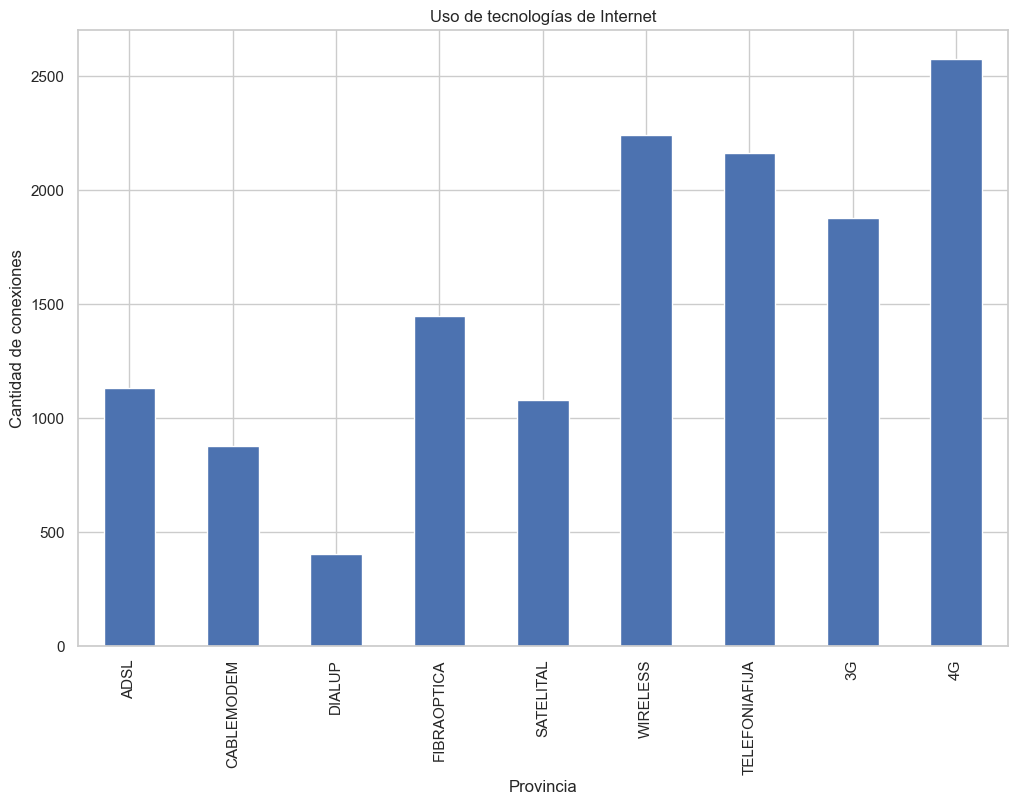

In [229]:
# Creamos un nuevo DataFrame con las columnas de tecnologías
tecnologias = df4[['ADSL', 'CABLEMODEM', 'DIALUP', 'FIBRAOPTICA', 'SATELITAL', 'WIRELESS', 'TELEFONIAFIJA', '3G', '4G']]

# Calculamos la suma de las tecnologías por provincia
tecnologias_por_provincia = tecnologias.sum()

# Configuramos el estilo del gráfico
sns.set(style="whitegrid")

# Creamos el gráfico de barras apiladas
plt.figure(figsize=(12, 8))
tecnologias_por_provincia.plot(kind='bar', stacked=True)

# Añadimos etiquetas y títulos
plt.xlabel('Provincia')
plt.ylabel('Cantidad de conexiones')
plt.title('Uso de tecnologías de Internet')

# Mostramos el gráfico
plt.show()

### **OBSERVACIONES - 5**

#### Mediante este quinto análisis podemos saber de manera detallada el consumo independiente de cada una de las tecnologías brindadas por la empresa, así como también una comparación general entre todas estas, por ejemplo: la red 4g es la más utilizada, seguido de la wireless, mientras que la de cable modem y dial up son las menos utilizadas según el dataset . Cabe resaltar que mediante este análisis se puede llegar a tomar desiciones en base al uso sectorizado de cada una de estas tecnologías.

### **CONCLUSIONES GENERALES**

#### **Diversificación de tecnologías:** Es importante reconocer la preferencia de los usuarios por tecnologías como 4G y Wireless, lo cual indica la necesidad de brindar un servicio de calidad y mejorar la infraestructura en estas áreas. También se debe prestar atención a las tecnologías menos utilizadas, como el Cable Modem y Dial Up, y evaluar su relevancia en el mercado actual.



#### **Crecimiento sostenido de accesos:** El crecimiento constante de los accesos a nivel nacional indica una demanda creciente de servicios de Internet fijo. La empresa debe estar preparada para satisfacer esta demanda mediante inversiones adecuadas en infraestructura y tecnología.

#### **Enfoque en tecnologías emergentes:** La tendencia de crecimiento más pronunciado en tecnologías como Cable Modem y Fibra Óptica sugiere una preferencia por conexiones más rápidas y estables. La empresa puede aprovechar esta oportunidad para promover y expandir el uso de estas tecnologías, ofreciendo ventajas competitivas en el mercado.

#### **Estrategia de ingresos:** El análisis de los ingresos trimestrales revela una tendencia de menor ingreso en el primer trimestre y un crecimiento progresivo en los trimestres posteriores. La empresa puede desarrollar estrategias para fortalecer el consumo de servicios en los primeros trimestres del año, como promociones especiales o mejoras en la calidad del servicio, para mantener un rendimiento constante a lo largo del año.

#### **Focalización en áreas de baja conectividad:** Identificar las provincias con menor acceso a Internet fijo, como Santa Cruz, Formosa y Chaco, brinda una oportunidad para la empresa de mejorar la conectividad en estas áreas. Se pueden implementar estrategias específicas, como inversiones en infraestructura y campañas de promoción, para aumentar la productividad y satisfacción de los usuarios en estas zonas.